### By Kanishk shirodkar

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_excel('new_part2.xlsx', index_col=0)

In [3]:
data

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,male,Q,S
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,0,0,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,0,0,1
7,0,1,"McCarthy, Mr. Timothy J",54.000000,0,0,17463,51.8625,1,0,1
12,1,1,"Bonnell, Miss. Elizabeth",58.000000,0,0,113783,26.5500,0,0,1
24,1,1,"Sloper, Mr. William Thompson",28.000000,0,0,113788,35.5000,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
883,0,3,"Dahlberg, Miss. Gerda Ulrika",22.000000,0,0,7552,10.5167,0,0,1
885,0,3,"Sutehall, Mr. Henry Jr",25.000000,0,0,SOTON/OQ 392076,7.0500,1,0,1
886,0,3,"Rice, Mrs. William (Margaret Norton)",39.000000,0,5,382652,29.1250,0,1,0


In [4]:
data=pd.DataFrame(data,columns=[ 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S','Survived',])
data

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Survived
PassengerId,,,,,,,,,
2,1,38.000000,1,0,71.2833,0,0,0,1
4,1,35.000000,1,0,53.1000,0,0,1,1
7,1,54.000000,0,0,51.8625,1,0,1,0
12,1,58.000000,0,0,26.5500,0,0,1,1
24,1,28.000000,0,0,35.5000,1,0,1,1
...,...,...,...,...,...,...,...,...,...
883,3,22.000000,0,0,10.5167,0,0,1,0
885,3,25.000000,0,0,7.0500,1,0,1,0
886,3,39.000000,0,5,29.1250,0,1,0,0


### Defining valriables X and Y

In [5]:
x = data.iloc[:,:-1].values
print(x.shape)

(889, 8)


In [6]:
y = data.iloc[:,-1].values
print(y.shape)

(889,)


### Splitting data into test set and train set

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [8]:
y_train.shape

(622,)

In [9]:
pd.DataFrame([x_train.shape , x_test.shape , y_train.shape , y_test.shape], index=['x_train','x_test','y_train','y_test'],columns=['rows','columns'] )

,rows,columns
x_train,622,8.0
x_test,267,8.0
y_train,622,NaN
y_test,267,NaN


###  Scaling independent variables

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

### Building the Model

In [11]:
from sklearn.linear_model import LogisticRegression 
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
y_pred=lr.predict(x_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1], dtype=int64)

In [13]:
y_test


array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1], dtype=int64)

###  Confusion matrix

In [14]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,y_pred)
print(confusion)
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]
pd.DataFrame([TP,TN,FP,FN],index=['TP','TN','FP','FN'])

[[145  20]
 [ 24  78]]


,0
TP,78
TN,145
FP,20
FN,24


#### Accuracy

In [15]:
from sklearn import metrics as met
accuracy=met.accuracy_score(y_test,y_pred)
print("classification accuracy:",accuracy*100)

classification accuracy: 83.52059925093633


#### Error

In [16]:
print("classification error is :",100*(1-accuracy))

classification error is : 16.479400749063664


#### TPR / TNR / FPR / FNR

In [17]:
TPR=100*met.recall_score(y_test,y_pred)
TNR=100*TN/(TN+FP)
FPR=100-TNR
FNR=100-TPR

pd.DataFrame([TPR,TNR,FPR,FNR],index=['TPR','TNR','FPR','FNR'])


,0
TPR,76.470588
TNR,87.878788
FPR,12.121212
FNR,23.529412


In [18]:
from sklearn.metrics import precision_score,f1_score,roc_auc_score
precision=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
roc_auc=roc_auc_score(y_test,y_pred)
pd.DataFrame([precision,f1,roc_auc],index=['precision','F1_score','roc_auc'])

,0
precision,0.795918
F1_score,0.780000
roc_auc,0.821747


### Accuracy of 83.5% at 0.3 test split and random state 0

# KNN

### split data 

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [20]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [21]:
pd.DataFrame([x_train.shape,x_test.shape,y_train.shape,y_test.shape],index=['xtrain','xtest','ytrain','ytest'])

,0,1
xtrain,666,8.0
xtest,223,8.0
ytrain,666,NaN
ytest,223,NaN


### building model

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [23]:
y_pred = knn.predict(x_test)

### confusion matric evaluation 

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
confusion_matrix(y_test, y_pred)

array([[125,  14],
       [ 19,  65]], dtype=int64)

In [25]:
accuracy_score(y_test, y_pred)

0.852017937219731

In [26]:
error = []
accuracy = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    accuracy.append(accuracy_score(y_test, pred_i))

Text(0, 0.5, 'Mean Error')

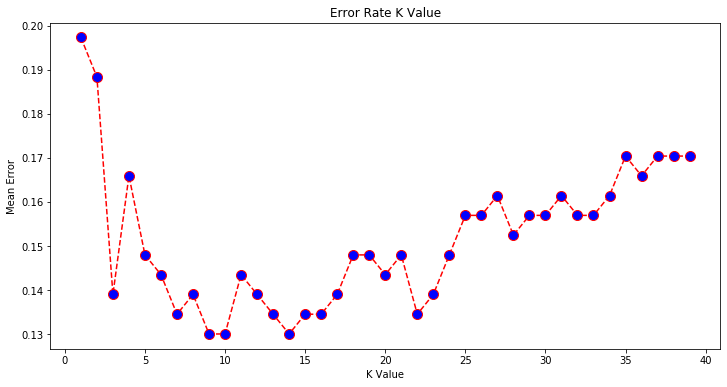

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(range(1,40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Text(0, 0.5, 'Accuracy')

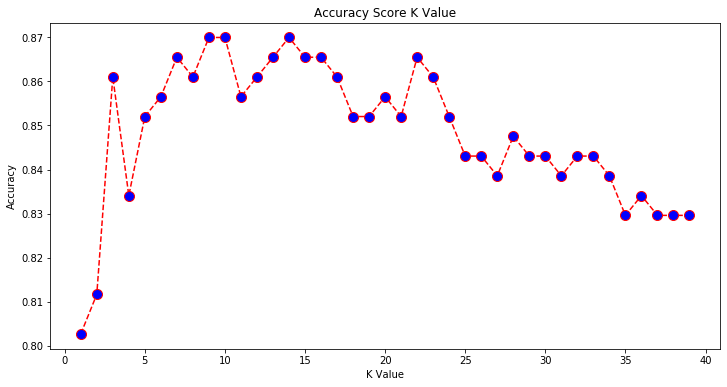

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(range(1,40), accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Score K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [30]:
y_pred1 = knn.predict(x_test)

In [31]:
confusion_matrix(y_test, y_pred1)

array([[124,  15],
       [ 17,  67]], dtype=int64)

In [32]:
accuracy_score(y_test, y_pred1)

0.8565022421524664

## max accuraccy is 85.6%

# Decision Tree

### Splitting data

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

### Scaling Data

In [34]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

### Building Model

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
cf=DecisionTreeClassifier()
cf=cf.fit(x_train,y_train)
y_pred=cf.predict(x_test)

In [37]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1], dtype=int64)

C:\Users\Pradeep Shirodkar\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


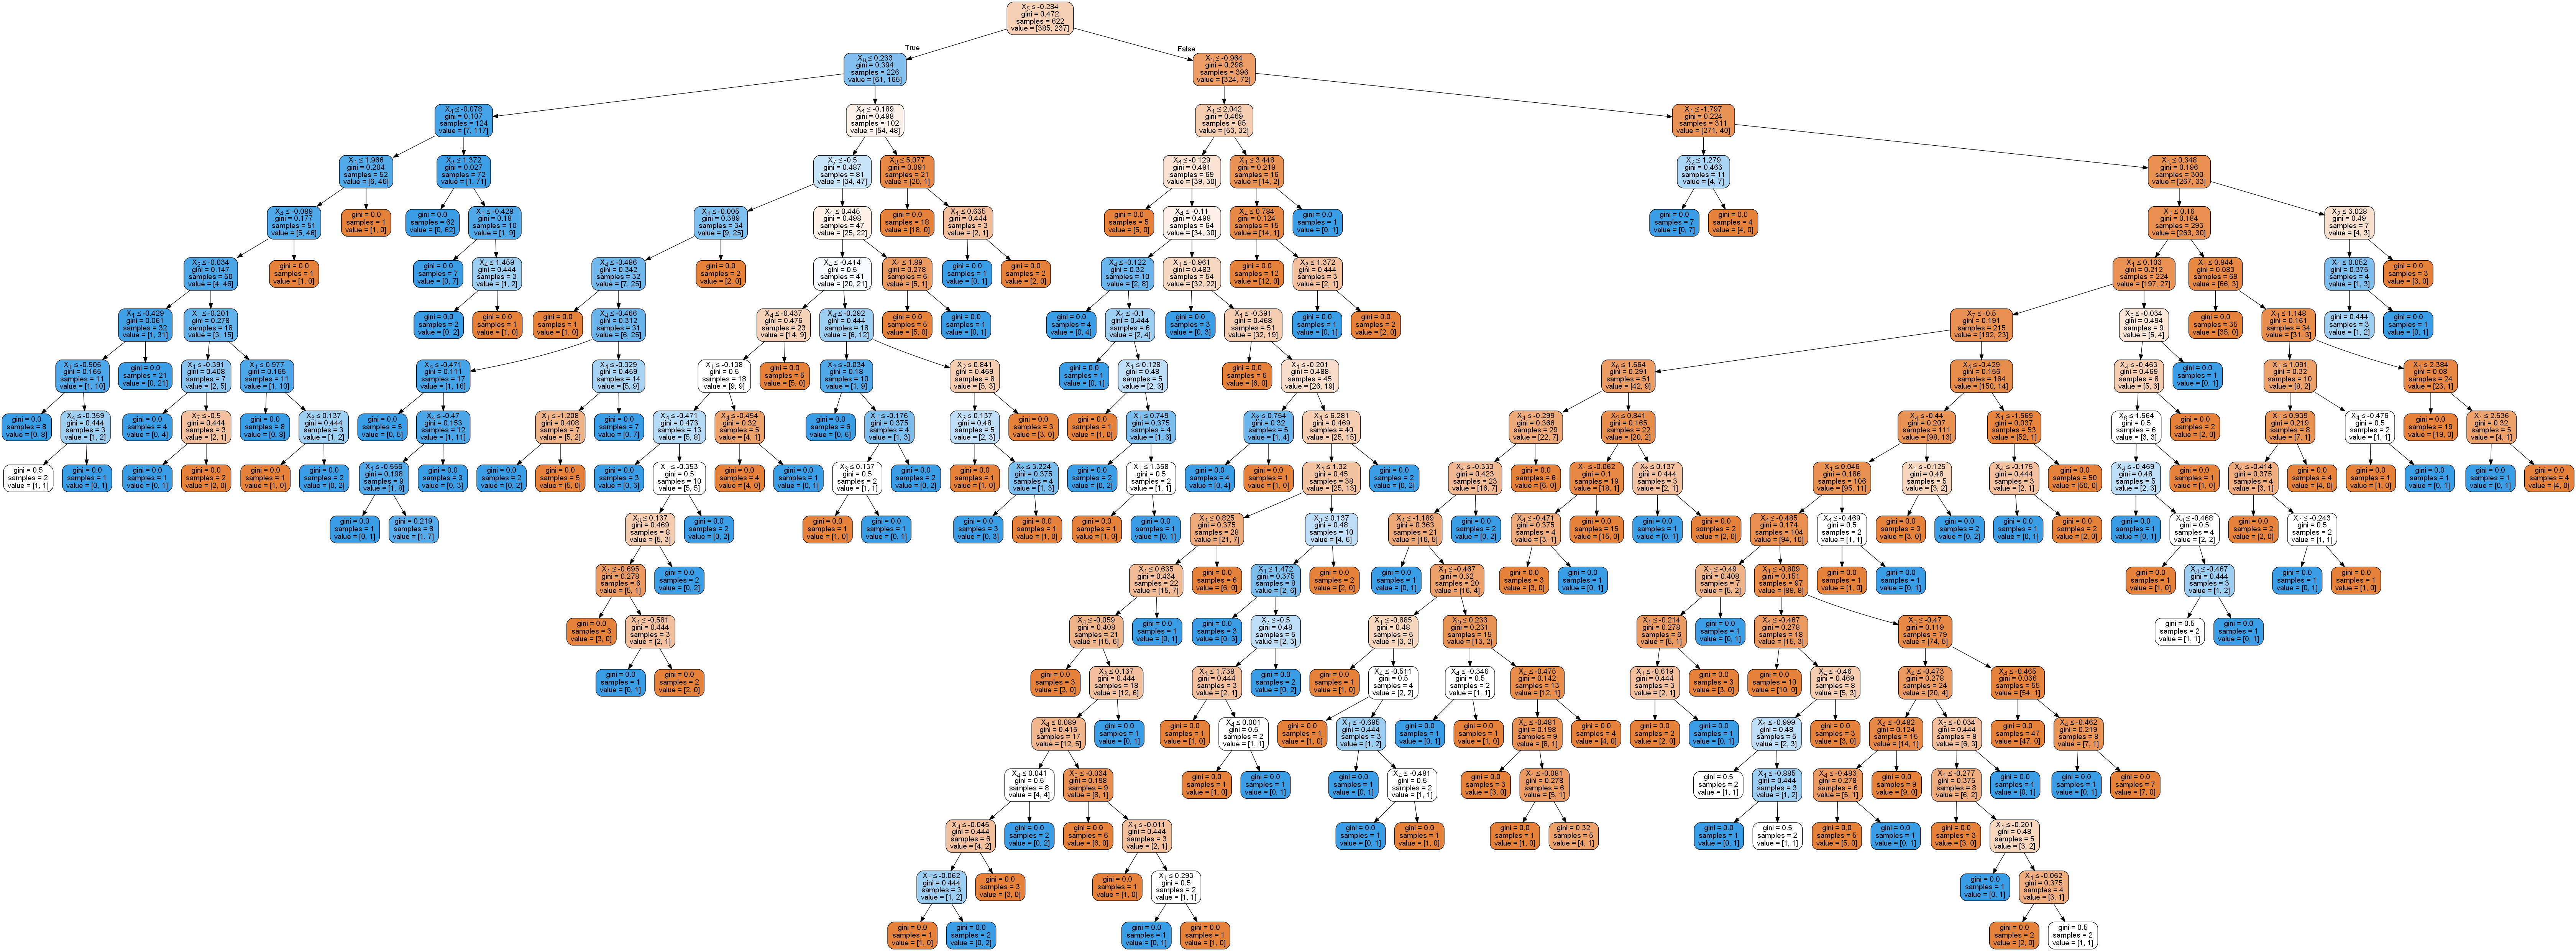

In [38]:

from sklearn.externals.six import StringIO  
from IPython.display import Image   
from sklearn.tree import export_graphviz 
import pydotplus 
dot_data = StringIO() 
export_graphviz(cf, out_file=dot_data,filled=True, rounded=True,special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(), width=12000, height=12000) 

### Model Evaluation Using CONFUSION MATRIX

In [39]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cn=confusion_matrix(y_test, y_pred)

TN=cn[0,0]
FP=cn[0,1]
FN=cn[1,0]
TP=cn[1,1]


In [40]:
print(cn)
print('TN:',TN)
print('FP:',FP)
print('FN:',FN)
print('TP:',TP)

[[141  23]
 [ 37  66]]
TN: 141
FP: 23
FN: 37
TP: 66


In [41]:
from sklearn import metrics
accuracy=metrics.accuracy_score(y_test,y_pred)
print("accuracy:",accuracy*100)

accuracy: 77.52808988764045


In [42]:
print("classification error:",100*(1-accuracy))

classification error: 22.47191011235955


In [43]:
TPR=100*metrics.recall_score(y_test,y_pred)
TNR=100*TN/(TN+FP)
FPR=100-TNR
FNR=100-TPR
pd.DataFrame([TPR,TNR,FPR,FNR],index=['TPR','TNR','FPR','FNR'])

,0
TPR,64.07767
TNR,85.97561
FPR,14.02439
FNR,35.92233


In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       164
           1       0.74      0.64      0.69       103

    accuracy                           0.78       267
   macro avg       0.77      0.75      0.76       267
weighted avg       0.77      0.78      0.77       267



In [45]:
# get best accuracy by varying test size
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics as met
from sklearn.tree import DecisionTreeClassifier


7 - 0.8472222222222222


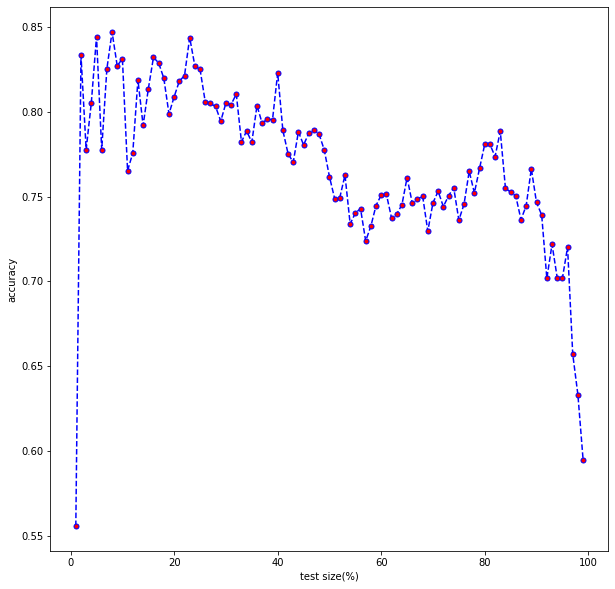

In [46]:
acc=[]
for i in range(1,100,1):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=i/100,random_state=0)
    scaler=StandardScaler()
    x_train=scaler.fit_transform(x_train)
    x_test=scaler.transform(x_test)
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    y_pred=dt.predict(x_test)
    accuracy=met.accuracy_score(y_test,y_pred)
    acc.append(accuracy)
plt.figure(figsize=(10,10))
plt.plot(range(1,100,1),acc,color='b',linestyle='dashed',marker='.',markerfacecolor='r',markersize='10')
plt.xlabel('test size(%)')
plt.ylabel('accuracy')
print(acc.index(max(acc)),'-',max(acc))

## Random Forest Classifier 


### Splitting data

In [47]:
from sklearn.model_selection import train_test_split
#splitting into train and test


In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
pd.DataFrame([x_train.shape , x_test.shape  , y_train.shape  ,  y_test.shape],index=['xtrain','xtest','ytrain','ytest'],columns=['row','columns'])

,row,columns
xtrain,666,8.0
xtest,223,8.0
ytrain,666,NaN
ytest,223,NaN


### Scaling data 

In [49]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


### Building the emodel

In [50]:
from sklearn.ensemble import RandomForestClassifier


In [51]:
rf=RandomForestClassifier(n_estimators=50,n_jobs=10,random_state=0)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1], dtype=int64)

In [52]:
y_test

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1], dtype=int64)

### Model evaluation using confusion matrix

In [53]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
TP=cm[1,1]
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
pd.DataFrame([TP,TN,FP,FN],index=['TP','TN','FP','FN'])

[[124  15]
 [ 16  68]]


,0
TP,68
TN,124
FP,15
FN,16


In [54]:
accuracy=met.accuracy_score(y_test,y_pred)
print("classification accuracy:",accuracy*100)

classification accuracy: 86.09865470852019


In [55]:
print("classification error is :",100*(1-accuracy))

classification error is : 13.901345291479817


TNR(true negetive rate) 

FPR(false positive rate) 

FNR(false negetive rate)

In [56]:
TPR=100*met.recall_score(y_test,y_pred)
TNR=100*TN/(TN+FP)
FPR=100-TNR
FNR=100-TPR

pd.DataFrame([TPR,TNR,FPR,FNR],index=['TPR/SENSITIVITY','TNR/SPECIFICITY','FPR','FNR'])

,0
TPR/SENSITIVITY,80.952381
TNR/SPECIFICITY,89.208633
FPR,10.791367
FNR,19.047619



## accuracy is 86.09%

In [57]:
from sklearn.metrics import precision_score,f1_score,roc_auc_score
precision=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
roc_auc=roc_auc_score(y_test,y_pred)
pd.DataFrame([precision,f1,roc_auc],index=['precision','F1_score','roc_auc'])

,0
precision,0.819277
F1_score,0.814371
roc_auc,0.850805


37 - 0.863905325443787


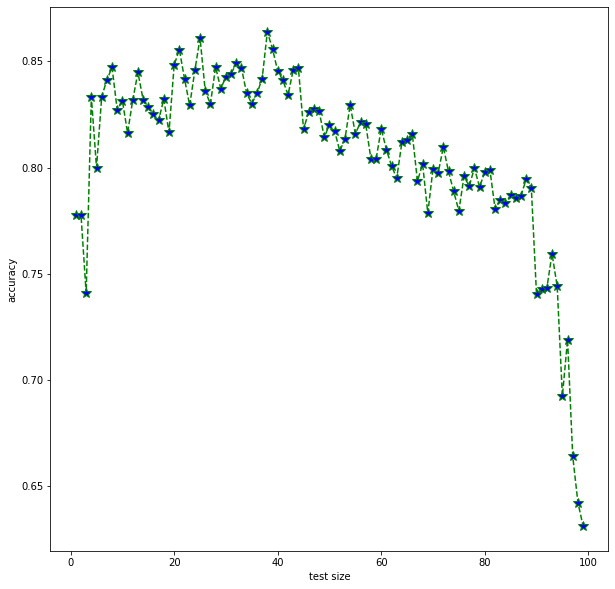

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics as met
from sklearn.ensemble import RandomForestClassifier
acc=[]
for i in range(1,100,1):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=i/100,random_state=0)
    scaler=StandardScaler()
    x_train=scaler.fit_transform(x_train)
    x_test=scaler.transform(x_test)
    rf=RandomForestClassifier(n_estimators=50,n_jobs=10,random_state=0)
    rf.fit(x_train,y_train)
    y_pred=rf.predict(x_test)
    accuracy=met.accuracy_score(y_test,y_pred)
    acc.append(accuracy)
plt.figure(figsize=(10,10))
plt.plot(range(1,100,1),acc,color='g',linestyle='dashed',marker='*',markerfacecolor='b',markersize='10')
plt.xlabel('test size')
plt.ylabel('accuracy')
print(acc.index(max(acc)),'-',max(acc))

# Inference

### From the above classification models,
### Random Forest classifier gave highest accuracy on randomly selected samples for a given test split